# AI Projekt Grupp 2 vi siktar på VG

William Mossberg, Viktor Eriksson, Oskar Johansson, Andreas Lindström

In [ ]:
from game.simulator import GameSimulator
from players.minimax_player import MinimaxPlayer
from trainers.qlearn import QLearnTrainer
from players.qlearn_player import QLearnPlayer
from players.random_player import RandomPlayer
from players.perfect_strategy_player import PerfectStrategyPlayer
from game.symbol import Symbol

## Define symbols for the agent and where to save the trained agent

In [12]:
agent_symbol = Symbol.X
opponent_symbol = Symbol.O

model_filename = 'models/model.pkl'

## Initialize the agent and decide number of epochs

In [13]:
n_epochs = 100_000
agent = QLearnPlayer(agent_symbol)

## Train the agent against a random player

Training: 100%|██████████| 100000/100000 [00:02<00:00, 46324.63it/s]


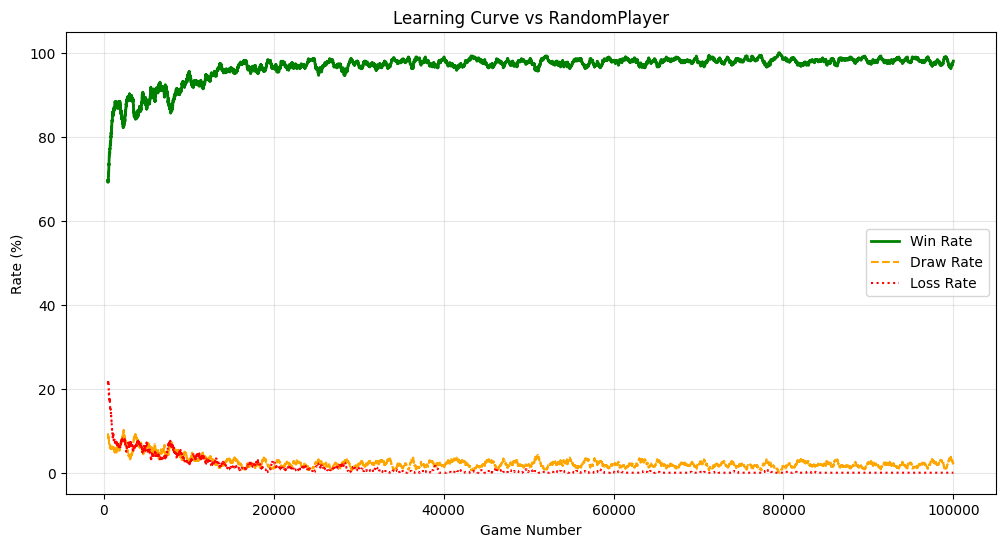

In [14]:
trainer = QLearnTrainer()
trainer.train(agent, RandomPlayer(opponent_symbol), n_epochs, model_filename)
trainer.plot()

## Continue the training against perfect strategy

Training: 100%|██████████| 100000/100000 [00:03<00:00, 25741.10it/s]


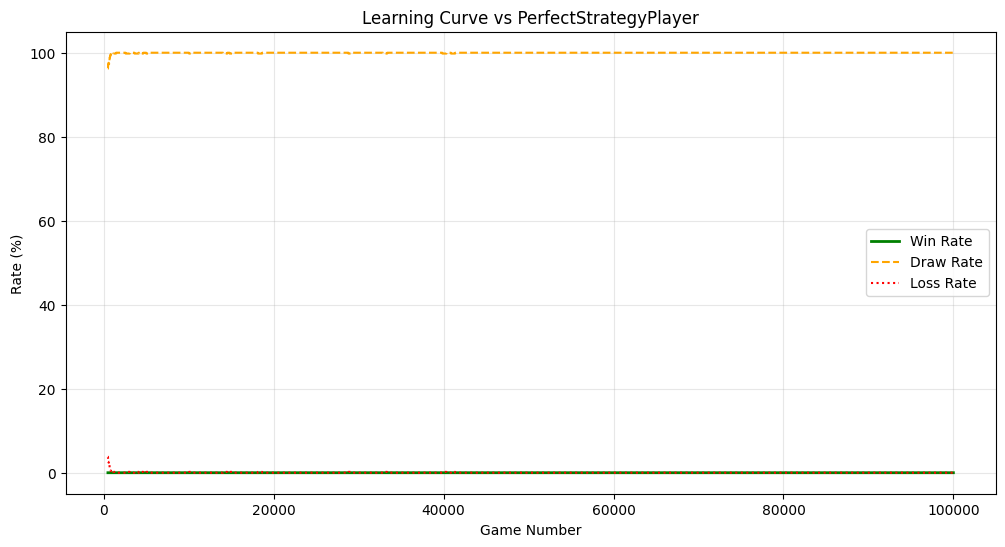

In [15]:
trainer = QLearnTrainer()
trainer.train(agent, PerfectStrategyPlayer(opponent_symbol), n_epochs, model_filename)
trainer.plot()

## Training only against minimax

Training: 100%|██████████| 100000/100000 [00:03<00:00, 27073.88it/s]


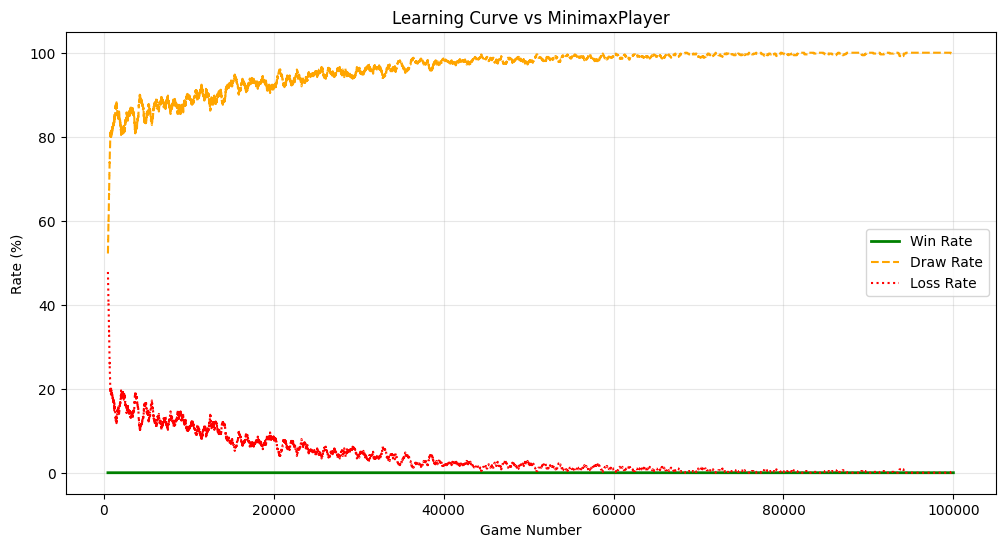

In [16]:
agent_trained_against_minimax = QLearnPlayer(Symbol.X)

trainer = QLearnTrainer()
trainer.train(agent_trained_against_minimax, MinimaxPlayer(Symbol.O), 100000, 'models/model_against_only_minimax.pkl')
trainer.plot()

## Choose number of simulations to run

In [17]:
n_simulations = 100

## Simulate against a random player

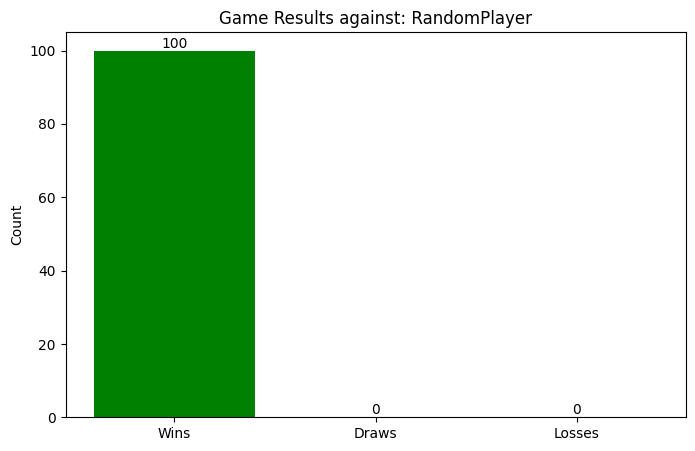

In [18]:
opponent = RandomPlayer(opponent_symbol)
simulator = GameSimulator(agent, opponent, n_simulations, Symbol.X)
simulator.simulate()
simulator.plot()

## Simulate against the provided perfect strategy

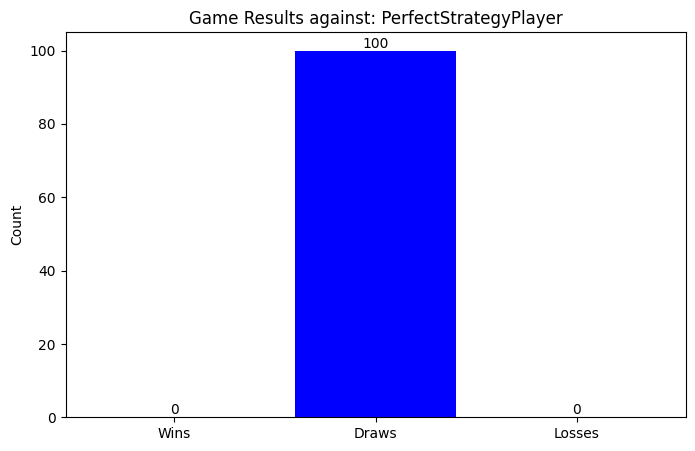

In [19]:
opponent = PerfectStrategyPlayer(opponent_symbol)
simulator = GameSimulator(agent, opponent, n_simulations, Symbol.X)
simulator.simulate()
simulator.plot()

## Simulate against minimax player

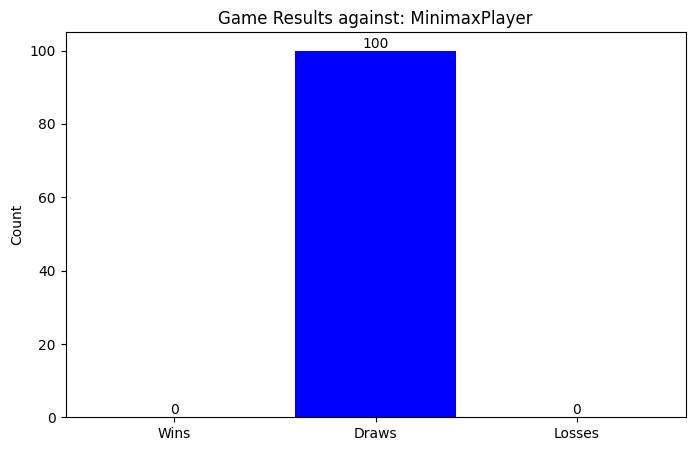

In [20]:
opponent = MinimaxPlayer(opponent_symbol)
simulator = GameSimulator(agent, opponent, n_simulations, Symbol.X)
simulator.simulate()
simulator.plot()

## Play against the model

If you want to try and play against the trained model. You could start by createing a virtual environment that uses python3.13. It has to be 3.13 for pygame to work correctly.

Here are all the commands to setup pygame:
```bash
python3.13 -m venv .venv
source .venv/bin/activate
pip3 install -r requirements.txt
pip3 install pygame
```
Play against trained q-learn model:
```bash
python3.13 gui/gui.py --player O --agent qlearn --model models/model.pkl 
```

Play against custom minimax:
```bash
python3.13 gui/gui.py --player O --agent minimax
```